# Tugas 2 — Transformasi Gambar

Notebook ini memproses foto `Foto/Maba-UMM-Sambut-Muktamar.jpg` menjadi versi kontras/warna tinggi seperti contoh, lalu menampilkan perbandingan before/after dan menyimpan hasilnya.

In [ ]:
from PIL import Image

def zoom_to_center(img: Image.Image, zoom_factor: float = 2.5) -> Image.Image:
    width, height = img.size
    
    crop_width = int(width / zoom_factor)
    crop_height = int(height / zoom_factor)
    
    left = (width - crop_width) // 2
    top = (height - crop_height) // 2
    right = left + crop_width
    bottom = top + crop_height
    
    cropped = img.crop((left, top, right, bottom))
    zoomed = cropped.resize((width, height), Image.Resampling.LANCZOS)
    
    return zoomed

In [ ]:
from pathlib import Path
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt

print("cwd:", Path.cwd())


cwd: d:\Kuliah\5. Semester 5\Fungsional\Praktikum\Functional\Jawaban\Modul 6


In [6]:
repo_root = Path.cwd().parents[1]
img_path = repo_root / "Foto" / "Maba-UMM-Sambut-Muktamar.jpg"
output_dir = repo_root / "Jawaban" / "Modul 6"
output_dir.mkdir(parents=True, exist_ok=True)
output_path = output_dir / "Maba-UMM-Sambut-Muktamar_after.jpg"
figure_path = output_dir / "Tugas_2_before_after.png"

def stylize(img: Image.Image) -> Image.Image:
    work = ImageOps.autocontrast(img, cutoff=1)
    work = ImageEnhance.Color(work).enhance(1.6)
    work = ImageEnhance.Contrast(work).enhance(1.9)
    work = ImageEnhance.Sharpness(work).enhance(1.25)
    work = ImageOps.posterize(work, bits=4)
    work = ImageOps.autocontrast(work, cutoff=2)
    return work


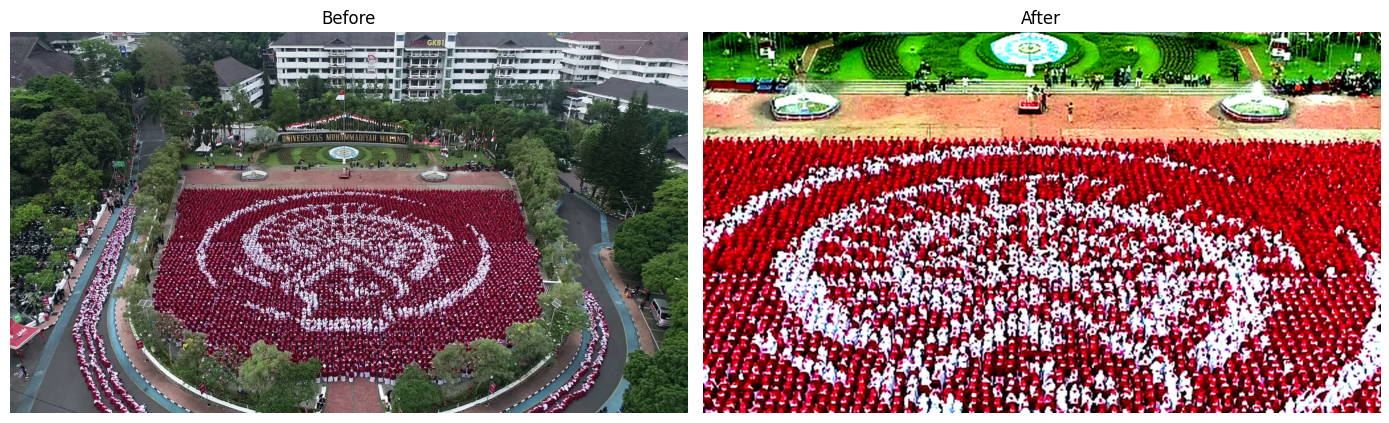

Processed image saved to: Maba-UMM-Sambut-Muktamar_after.jpg
Figure saved to: Tugas_2_before_after.png


In [ ]:
orig = Image.open(img_path).convert("RGB")
after = stylize(orig)

after = zoom_to_center(after, zoom_factor=2.5)

after.save(output_path, quality=95)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(orig)
axes[0].set_title("Before")
axes[0].axis("off")
axes[1].imshow(after)
axes[1].set_title("After")
axes[1].axis("off")
fig.tight_layout()
fig.savefig(figure_path, dpi=150)
plt.show()

print(f"Processed image saved to: {output_path.name}")
print(f"Figure saved to: {figure_path.name}")
